## Dataset 1 : AirBnB Open Data from Seattle
###### Problem to solve is Regression
********

## Converting all 3 csv files to dataframes

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import matplotlib.pyplot as plt
import seaborn as sb

nltk.download('vader_lexicon')
sb.set()
pd.set_option('display.max_columns', 500)   
# pd.set_option('display.max_rows', 500)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaikiat/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
calendar = pd.read_csv('seattle/calendar.csv')
listings = pd.read_csv('seattle/listings.csv')
reviews = pd.read_csv('seattle/reviews.csv')

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Cleaning up data 
* Removing all dollar signs
* Converting date to date time 
* Tabulating the number of nulls in the dataset



In [6]:
# Calendar df
calendar.price = calendar.price.replace('[\$,]', '', regex=True).astype(float)
calendar.date = pd.to_datetime(calendar.date)

# Listings df
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
listings.weekly_price = listings.weekly_price.replace('[\$,]', '', regex=True).astype(float)
listings.monthly_price = listings.monthly_price.replace('[\$,]', '', regex=True).astype(float)
listings.extra_people = listings.extra_people.replace('[\$,]', '', regex=True).astype(float)
listings.cleaning_fee = listings.cleaning_fee.replace('[\$,]', '', regex=True).astype(float)
listings.security_deposit = listings.security_deposit.replace('[\$,]', '', regex=True).astype(float)
listings.host_acceptance_rate = listings.host_acceptance_rate.astype(str).str.replace('%','').astype(float)
listings.host_response_rate = listings.host_response_rate.astype(str).str.replace('%','').astype(float)
listings.host_since = pd.to_datetime(listings.host_since)

# reviews df
reviews.date = pd.to_datetime(reviews.date)


In [7]:
# count the number of Null in each column for listing dataframe
listings.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by=['counts'],ascending=False)

,counts
license,3818
square_feet,3721
monthly_price,2301
security_deposit,1952
weekly_price,1809
notes,1606
neighborhood_overview,1032
cleaning_fee,1030
transit,934
host_about,859


In [8]:
# count the number of Null in each column for reviews dataframe
reviews.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by=['counts'],ascending=False)

,counts
comments,18


In [9]:
# count the number of Null in each column for calendar dataframe
calendar.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by=['counts'],ascending=False)

,counts
price,459028


# Basic Data Visualisation / Data Analysis
1. Using GeoPandas to visualise the location of the Airbnb around Seattle
2. Bar Graph to show number of airbnb per neighbourhood & avg price per neighbourhood
3. Graph to show how does price / number of bookings fluctuate throughout the year
4. Graph to show how does price differ for different property type / apartment type
5. Visualisation of the number of ammenities that a listing can have 
6. Sentiment analysis of airbnb reviews
-------------------

# 1. Using GeoPandas to visualise the location of the Airbnb around Seattle
Can comment this out because it is extremely slow

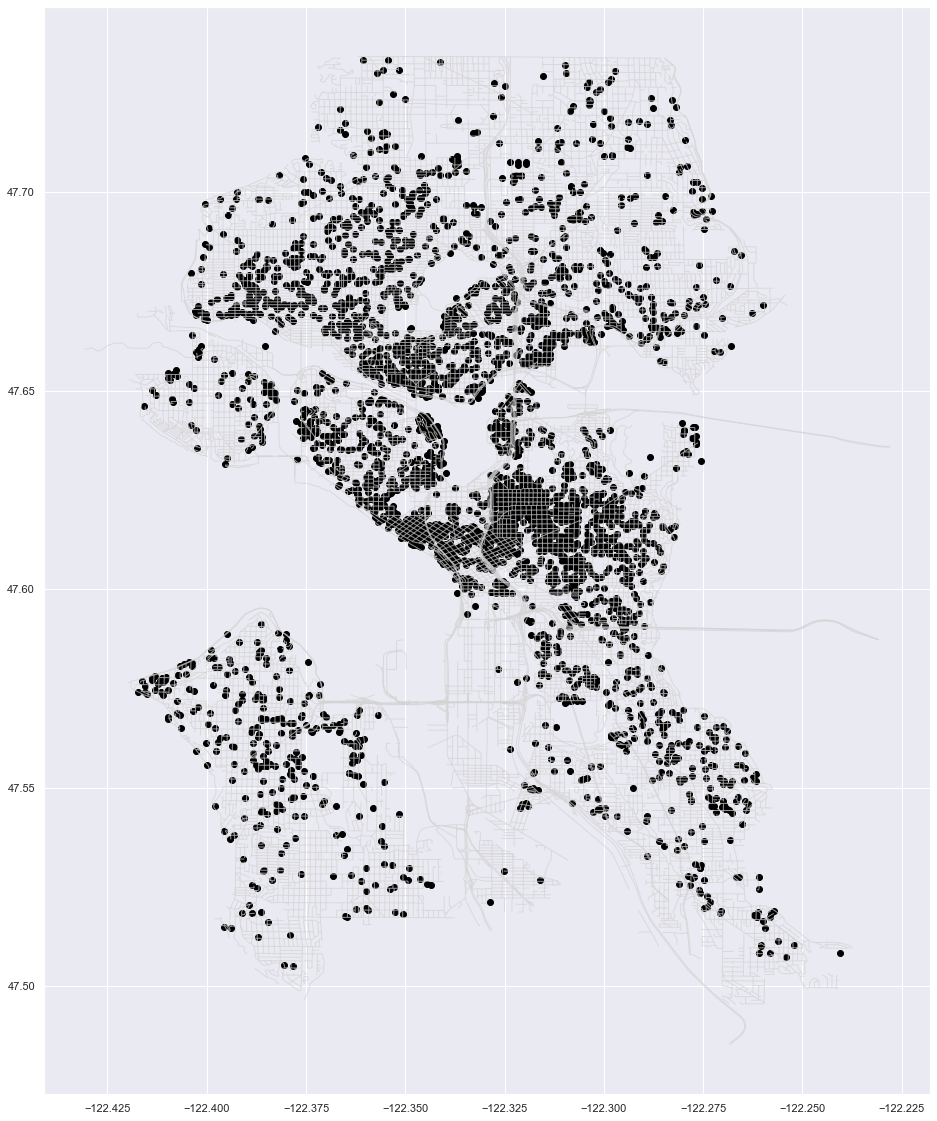

In [10]:
# create a geo panda dataframe  
listings_duplicate = listings.copy()
# change combined _listings to listings_duplicate 
gdf = gpd.GeoDataFrame(listings_duplicate,geometry=gpd.points_from_xy(listings_duplicate['longitude'],listings_duplicate['latitude']))
# reading seattle's street/map data
df_seattle = gpd.read_file('https://opendata.arcgis.com/datasets/383027d103f042499693da22d72d10e3_0.geojson')

fig,ax = plt.subplots(figsize=(30,20))    
# plotting seattle's street/map
df_seattle.plot(color='lightgrey',linewidth=1,alpha=0.7,ax=ax)
# plotting the location of the airbnbs
gdf.plot(color='black',ax=ax)

Most of the airbnbs are clustered in the middle of Seattle

# 2. Number of AirBnb per neighbourhood

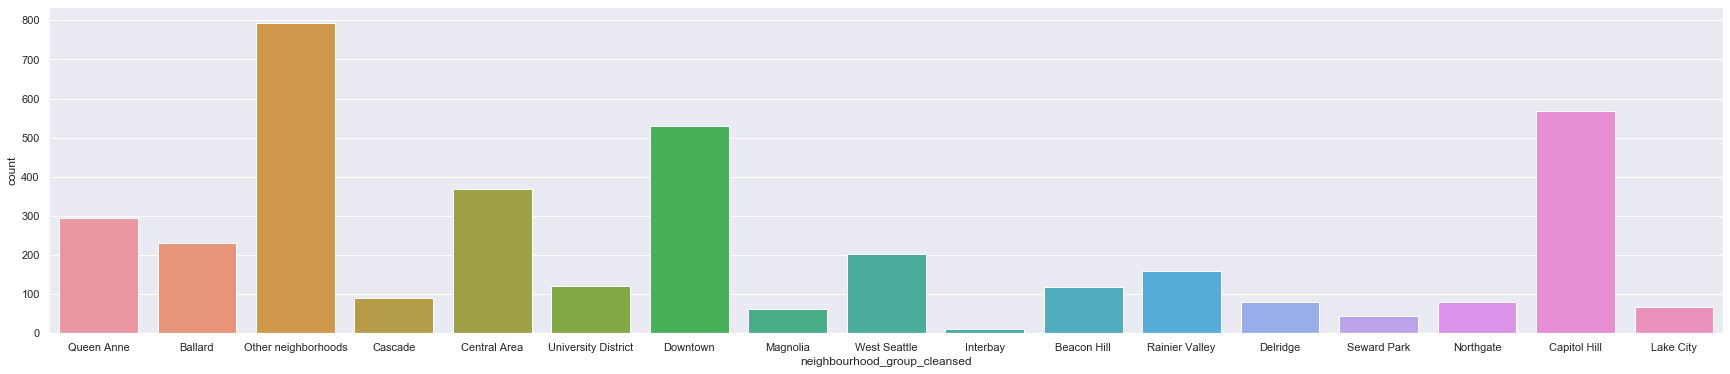

In [11]:
plt.figure(figsize=(30, 6))
sb.countplot(listings["neighbourhood_group_cleansed"])

# 3. Average Price per neighbourhood

In [12]:
listings.neighbourhood_group_cleansed=listings.neighbourhood_group_cleansed.astype('category')


# Plot the price distribution for different neighbourhoods
listings_filtered = pd.DataFrame(listings[["price", "neighbourhood_group_cleansed"]])
price_distribution=pd.pivot_table(listings_filtered,
                                  values = ['price'],
                                  index=['neighbourhood_group_cleansed'] ,
                                  aggfunc = {'price':np.mean})
# count distribution
count_distribution=listings_filtered.groupby('neighbourhood_group_cleansed').count().rename(columns = {'price':'Number of Listings'})

# merge both dataframe together
count_distribution.reset_index()
price_distribution.reset_index()
combined_dist=count_distribution.merge(price_distribution,left_on='neighbourhood_group_cleansed',right_on='neighbourhood_group_cleansed')
combined_dist.rename(columns ={'price':'Average Price/day'}).sort_values(by=['Average Price/day'],ascending=False)

,Number of Listings,Average Price/day
neighbourhood_group_cleansed,,
Magnolia,61,177.672131
Queen Anne,295,157.223729
Downtown,530,154.405660
West Seattle,203,141.359606
Cascade,89,140.101124
Capitol Hill,567,130.592593
Central Area,369,128.338753
Ballard,230,124.682609
Other neighborhoods,794,119.968514


# 4. Graph to show how does price & booking fluctuate throughout the year
1)Graph for **average price** against **time**

2)Graph for **number of bookings** against **time**

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


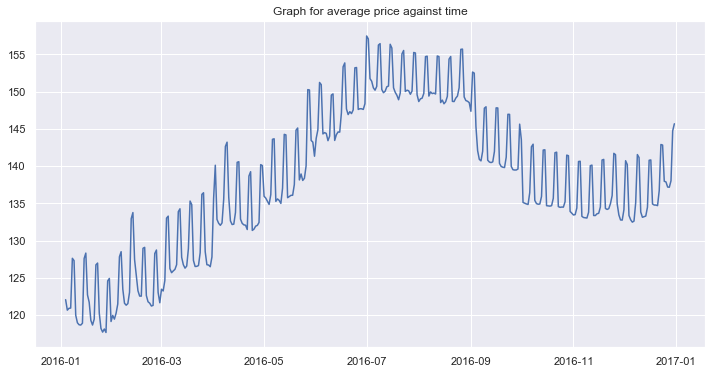

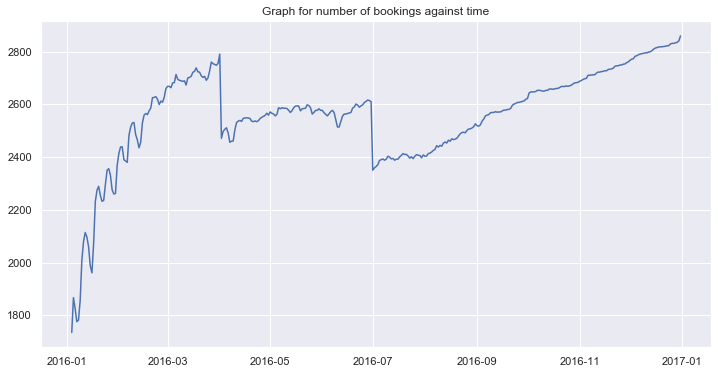

In [13]:
# from pandas.tseries import converter
# converter.register()

# Graph for average price against time
calendar_filtered1 = calendar.dropna()
# only consider 2016 data
calendar_filtered1=calendar_filtered1[calendar_filtered1['date'].dt.year==int(2016)]
calendar_filtered1=calendar_filtered1.drop('listing_id',axis=1).groupby(['date']).mean()
calendar_filtered1.reset_index(inplace=True)
# calendar_filtered1['date'] = pd.to_datetime(calendar_filtered1['date'])

plt.figure(figsize=(12,6))
plt.title('Graph for average price against time')
plt.plot(calendar_filtered1['date'], calendar_filtered1['price'])


# Graph for number of bookings against time
# assumption remove available = f from calculation
calendar_filtered2 = calendar.dropna()
# only consider 2016 data
calendar_filtered2=calendar_filtered2[calendar_filtered2['date'].dt.year==int(2016)]
calendar_filtered2=calendar_filtered2.groupby(['date']).size().reset_index(name='counts')
calendar_filtered2['date'] = pd.to_datetime(calendar_filtered2['date'])


plt.figure(figsize=(12,6))
plt.title('Graph for number of bookings against time')
plt.plot(calendar_filtered2['date'], calendar_filtered2['counts'])



The number of booking peaks towards the end of the year as well as during April, to maximise profits the host should raise prices during this 2 period

# 4. Graph to show how price differ for different property / apartment type

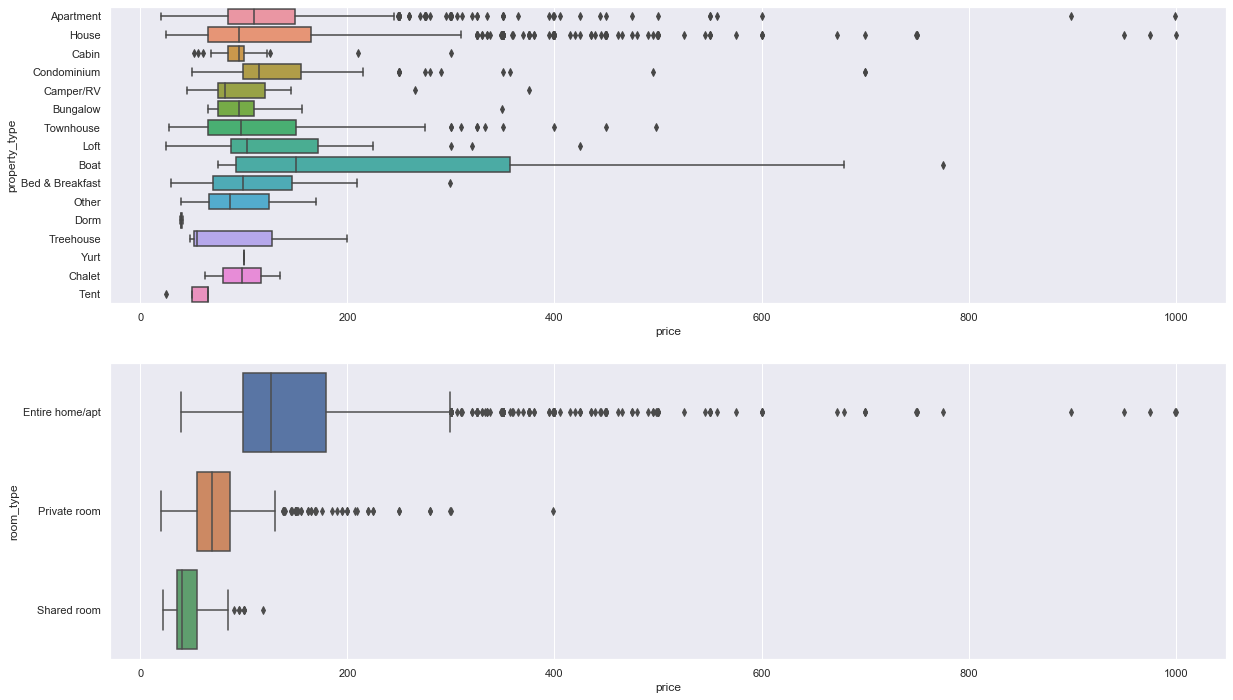

In [14]:
f, axes = plt.subplots(2, 1, figsize=(20,12))
sb.boxplot(x = listings.price , y = listings.property_type , data = listings , orient = "h" , ax = axes[0])
sb.boxplot(x = listings.price , y = listings.room_type , data = listings , orient = "h" , ax=axes[1])

* Property Type = Apartment & House have the most outliers
* Room Type = Entire Room has the most outliers and are generally more expensive

# 5 . Visualisation of the number of ammenities that a listing can have

In [15]:
listings['no_of_amenites']= listings.apply(lambda row : len(row.amenities.split(',')) ,axis=1)
listings[['amenities','no_of_amenites']].head()

,amenities,no_of_amenites
0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",10
1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",16
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",21
3,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",14
4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",13


Text(0, 0.5, 'Count')

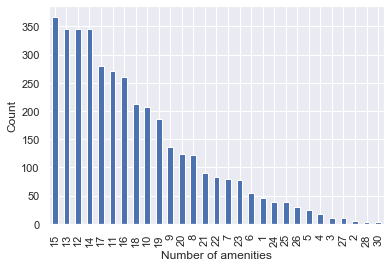

In [16]:
listings['no_of_amenites'].value_counts().plot(kind = 'bar')
plt.xlabel('Number of amenities')
plt.ylabel('Count')

# 6. Sentiment analysis of airbnb reviews

In [17]:
df_comments = reviews[['listing_id', 'comments','id']].copy().rename(columns = {'id':'comment_id'})
df_neighbourhood = listings[['id','neighbourhood_cleansed']]


def getNeighborhood(listing_id):
    neighbourhood = listings.loc[listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

df_comments.dropna(inplace = True)  #drop all empty rows
df_comments['neighbourhood'] = df_comments['listing_id'].apply(getNeighborhood)
df_comments

,listing_id,comments,comment_id,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,38917982,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,39087409,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",39820030,Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,40813543,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,41986501,Lower Queen Anne
...,...,...,...,...
84844,3624990,The description and pictures of the apartment ...,50436321,First Hill
84845,3624990,We had an excellent stay. It was clean and com...,51024875,First Hill
84846,3624990,"Gran ubicación, cerca de todo lo atractivo del...",51511988,First Hill
84847,3624990,"Very good apartement, clean and well sized. Si...",52814482,First Hill


In [ ]:
def sentiment_analyzer_scores(comment):
    sentence = str(comment)
    score = analyser.polarity_scores(comment)
    return score['compound']

analyser = SentimentIntensityAnalyzer()
df_comments['polarity'] = df_comments['comments'].apply(sentiment_analyzer_scores)
df_comments.sort_values(by=['polarity'],ascending=True,inplace = True)

df_comments.sample(10)

Due to certain limitation in the SentimentIntensityAnalyzer library , reviews writen in foreign languages tend to have a lower polarity score.

In [ ]:
# A histogram of the polarity scores (to show the spread of polarity scores)
num_bins = 50
plt.figure(figsize=(18,8))
n, bins, patches = plt.hist(df_comments.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity score')
plt.show()

In [ ]:
print('The mean polarity score is = ' + str(df_comments.polarity.describe().iloc[1]))
print('The median polarity score is = ' + str(df_comments.polarity.describe().iloc[5]))

Most reviews have a positive score , with a significant number close to 1.

In [ ]:
polarity_per_listing_id=df_comments.groupby('listing_id',as_index=False)['polarity'].mean()
polarity_per_listing_id.sort_values(by=['polarity'],ascending=True,inplace = True)
polarity_per_listing_id.sample(5)

In [ ]:
print('Positive scores: ',polarity_per_listing_id['polarity'][polarity_per_listing_id['polarity'] > 0].count())
print('Negative scores: ',polarity_per_listing_id['polarity'][polarity_per_listing_id['polarity'] < 0].count())
print('Neutral scores: ',polarity_per_listing_id['polarity'][polarity_per_listing_id['polarity'] == 0].count())

In [ ]:
# A histogram of the polarity scores grouped by listing_id
num_bins = 50
plt.figure(figsize=(18,8))
n, bins, patches = plt.hist(polarity_per_listing_id.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity grouped by listings id')
plt.show();

In [ ]:
print('The mean polarity score is = ' + str(polarity_per_listing_id.polarity.describe().iloc[1]))
print('The median polarity score is = ' + str(polarity_per_listing_id.polarity.describe().iloc[5]))

When the polarity scores are grouped by listing_id there is a slight left shift in the graph , this implies that there are once in a while there are negative reviews to pull the average polarity score for eact listing_id.

# Linear Regression

In [ ]:
# Right join btw 2 dataframes (on 'id')
# listings & polarity_per_listing_id
combined_listings = (polarity_per_listing_id.merge(listings,left_on='listing_id',right_on='id',how='right')).drop('listing_id',axis=1)
combined_listings.shape

In [ ]:
combined_listings.head()

### Price's correlation with other variable

In [ ]:
filtered_listings = listings.select_dtypes(include =['float64','int64']) 
to_drop = ['id','scrape_id','host_id','latitude','longitude','license']
filtered_listings = filtered_listings.drop(to_drop,axis=1)
filtered_listings.corr()['price'].sort_values()